In [1]:
#allows any changes on external files to be loaded on code run.
%load_ext autoreload
%autoreload 2

# Generate Fake GENE Data

In [2]:
import sys
import os
pathap = os.path.join('GENE_ML','gene_ml','static_sparse_grid_approximations')
print('PATHAP',pathap)
sys.path.append(pathap)
from GENE_ML.gene_ml.samplers.LatinHyperCube import LatinHyperCube 
from GENE_ML.gene_ml.datagen.datagen import DataGen
from config import Config
config = Config()

num_samples = 1000
parameters = ['_grp_species_0-omt','_grp_species_1-omt','species-omn']
bounds = [(4,6.7), (2.1,3.5), (0.16,2.9)] #if bounds is a float rather than tuple then the sampler will make that the only value
nominal = [2.7954880, 5.3871083, 1.5417906]
sampler_latin_hyper_cube = LatinHyperCube(parameters=parameters, num_samples=num_samples ,bounds=bounds)




single_run_timelim = 200
single_run_simtimelim = None#10e-2#put this in seconds and it will be converted to the correct units for GENE

remote_save_name = "FAKE_GENE_UQ_LHC"

ex_id='fake_gene_uq_lhc'

datagen = DataGen(config, sampler_latin_hyper_cube, 
                  ex_id=ex_id, remote_save_name=remote_save_name, 
                  single_run_timelim=single_run_timelim, 
                  single_run_simtimelim=single_run_simtimelim, num_workers=6)





PATHAP GENE_ML/gene_ml/static_sparse_grid_approximations


/home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
/home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/paramiko/transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


<class 'paramiko.sftp_file.SFTPFile'>


In [5]:
datagen.remote_save_dir

'/scratch/project_462000451/gene_out/gene_auto/FAKE_GENE_UQ_LHC'

In [5]:
datagen.executor.print_check_parameters()


EXECUTOR, PRINT_CHECK_PARAMETERS
 ----------------------------------------------------------------------------------------------------


SINGLE RUN TIMELIM 200 N SAMPLES 167
THE ESTIMATED WALLTIME FOR RUN ex-fake_gene_uq_lhc_batch-0 is 00-10:12:20, dd-hh-mm-ss TO RUN 167 SAMPLES
ALTERING THE BASE PARAMETERS FILE TO SET THE TIMELIM AND SIMTIMELIM TO THE WALLTIME
Writing to /home/djdaniel/GENE_UQ/parameters_base_uq_highprec


CODE RUN: SETTING SIMULATION TIME LIMMIT


PARSING SAMPLES TO INPUT FILE at temp/parameters_ex-fake_gene_uq_lhc_batch-0
Writing to /home/djdaniel/GENE_UQ/temp/
&parallelization
    n_procs_s = 2
    n_procs_v = -1
    n_procs_w = -16
    n_procs_x = 1
    n_procs_y = 1
    min_npz = 4
    n_procs_z = -4
/

&box
    n_spec = 2
    nx0 = 15
    nky0 = 1
    nz0 = 24
    nv0 = 48
    nw0 = 16
    x0 = 0.75
    kymin = 0.1
    n0_global = -1111
    adapt_ly = .true.
    lx = 125.628
    lv = 3.0
    lw = 9.0
/

&in_out
    diagdir = '/scratch/project_462000451/gene_out

In [6]:
# datagen.executor.start_runs()

EXECUTING BATCHES

CODE RUN


SINGLE RUN TIMELIM 200 N SAMPLES 167
THE ESTIMATED WALLTIME FOR RUN ex-fake_gene_uq_lhc_batch-0 is 00-10:12:20, dd-hh-mm-ss TO RUN 167 SAMPLES
ALTERING THE BASE PARAMETERS FILE TO SET THE TIMELIM AND SIMTIMELIM TO THE WALLTIME
Writing to /home/djdaniel/GENE_UQ/parameters_base_uq_highprec


CODE RUN: SETTING SIMULATION TIME LIMMIT


PARSING SAMPLES TO INPUT FILE at temp/parameters_ex-fake_gene_uq_lhc_batch-0
Writing to /home/djdaniel/GENE_UQ/temp/
GENERATING SBATCH FROM PARAMETERS FILE at temp/sbatch_ex-fake_gene_uq_lhc_batch-0
WALL CLOCK LIMIT FOR BATCH ex-fake_gene_uq_lhc_batch-0:   00-10:12:20
CREATING A NEW PROBLEM DIR WITH SSH
MOVING PARAMETERS AND SBATCH FILES TO CORRECT LOCATION IN REMOTE; SUBMITTING GENE SBATCH
set lib path in ./tools/scanscript
set lib path in ./tools/scanscript
created prob01
copied parameters
created link to the GENE executable in the bin directory
CREATING auto_prob_ex-fake_gene_uq_lhc_batch-0 in /project/project_462000451/gene/

# Gather all data in input uncertainty space to make a fake GENE to test the spatially adaptive sparse grids from sparseSpACE 


In [24]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from config import Config
config = Config()
import os 
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser

parser = GENE_scan_parser(config)
remote_path = os.path.join('/scratch/project_462000451/gene_out/gene_auto/FAKE_GENE_UQ')
data_set_fake_gene_600_uniform = ScanData2(config, 'fake_gene', parser=parser, save_dir=remote_path, split_ratio=[1,0,0])
data_set_fake_gene_600_uniform.df.insert(1,'omt1',data_set_fake_gene_600_uniform.df.pop('omt1'))
data_set_fake_gene_600_uniform.df.rename(columns={'omt1':parameters[0], 'omt2':parameters[1], 'omn1': parameters[2]}, inplace=True)
data_set_fake_gene_600_uniform.set_from_df()
data_set_fake_gene_600_uniform.df


<class 'paramiko.sftp_file.SFTPFile'>
Initialising dataset
SETTING VARIABLES
End of SCAN DATA init


,omt2,omt1,omn1,growthrate,frequency,REST
0,2.216021,4.499231,0.641922,0.097257,0.112127,rest
1,2.278796,4.539037,1.476648,0.100462,0.061907,rest
2,2.360896,6.083308,0.184732,0.128500,0.153323,rest
3,3.096989,5.836209,2.811306,0.114628,-0.020000,rest
4,2.805113,5.275577,1.883526,0.116640,0.040983,rest
...,...,...,...,...,...,...
595,2.248557,4.465864,0.426459,0.094365,0.124681,rest
596,2.893891,6.004068,0.250057,0.130107,0.146540,rest
597,2.594185,5.912984,0.788645,0.131591,0.114927,rest
598,3.161537,4.017005,1.456472,0.089051,0.051453,rest


In [ ]:
from collections import deque

def read_last_lines(file_path, num_lines):
    with open(file_path, 'rb') as file:
        return deque(file, maxlen=num_lines)

In [25]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from config import Config
config = Config()
remote_path = os.path.join('/scratch/project_462000451/gene_out/gene_auto/FAKE_GENE_UQ_LHC')
data_set_fake_gene_1000_lhc = ScanData2(config, 'fake_gene_lhc', parser=datagen.parser, save_dir=remote_path, split_ratio=[1,0,0])
data_set_fake_gene_1000_lhc.df.insert(1,'omt1',data_set_fake_gene_1000_lhc.df.pop('omt1'))
data_set_fake_gene_1000_lhc.df.rename(columns={'omt1':parameters[0], 'omt2':parameters[1], 'omn1': parameters[2]}, inplace=True)
data_set_fake_gene_1000_lhc.set_from_df()
data_set_fake_gene_1000_lhc.df

<class 'paramiko.sftp_file.SFTPFile'>
Initialising dataset
SETTING VARIABLES
End of SCAN DATA init


,omt2,omt1,omn1,growthrate,frequency,REST
0,3.006791,5.261130,1.565684,0.119286,0.059318,rest
1,2.949785,5.955788,2.846714,0.116686,-0.019013,rest
2,2.713881,5.893278,1.979671,0.129804,0.042262,rest
3,2.164134,4.846080,2.805192,0.083114,-0.024172,rest
4,3.352664,4.703074,1.726754,0.105059,0.040456,rest
...,...,...,...,...,...,...
995,2.332345,6.302666,1.643222,0.139502,0.069575,rest
996,2.673552,5.991450,0.423071,0.130704,0.136984,rest
997,2.582661,5.346043,1.758524,0.118811,0.051294,rest
998,2.993498,6.493537,0.479045,0.143098,0.136171,rest


In [26]:
data_set_fake_gene_combined = data_set_fake_gene_1000_lhc.concat([data_set_fake_gene_600_uniform])

In [27]:
data_set_fake_gene_combined.df

,omt2,omt1,omn1,growthrate,frequency,REST
0,3.006791,5.261130,1.565684,0.119286,0.059318,rest
1,2.949785,5.955788,2.846714,0.116686,-0.019013,rest
2,2.713881,5.893278,1.979671,0.129804,0.042262,rest
3,2.164134,4.846080,2.805192,0.083114,-0.024172,rest
4,3.352664,4.703074,1.726754,0.105059,0.040456,rest
...,...,...,...,...,...,...
595,2.248557,4.465864,0.426459,0.094365,0.124681,rest
596,2.893891,6.004068,0.250057,0.130107,0.146540,rest
597,2.594185,5.912984,0.788645,0.131591,0.114927,rest
598,3.161537,4.017005,1.456472,0.089051,0.051453,rest


In [25]:
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from GENE_ML.gene_ml.dataset.ScanData import ScanData
from config import config
import os

# parser
parameters = ['_grp_species_0-omt','_grp_species_1-omt','species-omn']
parser = GENE_scan_parser(config.save_dir, config.base_params_path)
ssg_data = ScanData('data_ssg_2omt-highprec_omn', parser=parser, host=None, remote_path=None,  test_percentage=0)
ssg_data.df.insert(1,'omt1',ssg_data.df.pop('omt1'))
ssg_data.df.rename(columns={'omt1':parameters[0], 'omt2':parameters[1], 'omn1': parameters[2]}, inplace=True)
ssg_data.set_from_df()
ssg_data.df




Initialising dataset
SSH PATH None:None
SCAN LOG PATH /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'geneerr_batch-1_scanfiles-0.log'
 'scan_batch-0_scanfiles-0.log' 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/geneerr_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/geneerr_batch-1_scanfiles-0.log

84 SAMPLES RAN OUT OF 99 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 84
NaN PERCENTAGE =  0.0
SETTING VARIABLES
TEST PERCENTAGE IS 0, NO SPLIT
TEST PERCENTAGE IS 0, NO SPLIT


,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,16.739,5.35,2.800000,1.530000,0.12091,0.06387
1,17.068,6.70,2.800000,1.530000,0.14990,0.07666
2,15.260,5.35,3.500000,1.530000,0.12286,0.05903
3,16.935,5.35,2.800000,2.900000,0.09682,-0.03230
4,14.677,4.00,2.800000,1.530000,0.08748,0.04885
...,...,...,...,...,...,...
37,13.279,5.35,2.338905,0.160000,0.11208,0.14882
38,16.836,5.35,3.204145,2.320970,0.11286,0.00899
39,14.242,5.35,2.100000,0.627572,0.11620,0.12186
40,15.789,5.35,3.500000,2.679778,0.10445,-0.02279


# Prepare Mode Test Data incase to be used for fake gene

In [33]:
import numpy as np
import pandas as pd
from GENE_ML.gene_ml.dataset.ScanData import ScanData
# Getting Ground Truth Data
nominal = [2.7954880, 5.3871083, 1.5417906]
parameters = ['_grp_species_0-omt','_grp_species_1-omt','species-omn']
remote_save_names = ['modeTrans-highprec-'+p for p in parameters]
    
GENE_groundTruth = []
for rms in remote_save_names:
    GENE_groundTruth.append(ScanData(rms, parser=parser, config=config,  host=None, remote_save_dir=None,  test_percentage=0))

# Putting ground truth in correct format for inference, with other nominal parameters in place -------------   
nominal_block = np.stack([nominal for i in range(len(GENE_groundTruth[0].df))])
nominal_df = pd.DataFrame(nominal_block)
nominal_df.columns=parameters

for i in range(len(parameters)):
    new_df = nominal_df.copy()
    col = GENE_groundTruth[i].df.columns.values.tolist()
    new_df[parameters[i]] = GENE_groundTruth[i].df[col[1]].tolist()
    new_df['growthrate']=GENE_groundTruth[i].df['growthrate'].tolist()
    new_df['frequency']=GENE_groundTruth[i].df['frequency'].tolist()
    new_df.insert(0, 'run_time', GENE_groundTruth[i].df['run_time'].to_numpy())
    GENE_groundTruth[i].df = new_df
    GENE_groundTruth[i].set_from_df()    
    # print(GENE_groundTruth[i].x[0:5])
    # print(parameters)
    # print('NEW DF', GENE_groundTruth[i].df.head(5))


from IPython.display import display
for gt in GENE_groundTruth:
    display(gt.df.head())
#--------------------------------------------------------------------------------

Initialising dataset
SSH PATH None:None
SCAN LOG PATH /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'geneerr_batch-1_scanfiles-0.log'
 'scan_batch-0_scanfiles-0.log' 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-1_scanfiles-0.log

50 SAMPLES RAN OUT OF 55 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 50
NaN PERCENTAGE =  0.0
SETTING VARIABLES
TEST

,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,30.330,4.000000,5.387108,1.541791,0.08769,0.03151
1,31.028,4.055102,5.387108,1.541791,0.08940,0.03205
2,27.473,4.110204,5.387108,1.541791,0.09110,0.03260
3,27.004,4.165306,5.387108,1.541791,0.09278,0.03314
4,25.307,4.220408,5.387108,1.541791,0.09445,0.03369


,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,22.374,2.795488,2.100000,1.541791,0.05138,0.03575
1,22.731,2.795488,2.128571,1.541791,0.05138,0.03558
2,21.778,2.795488,2.157143,1.541791,0.05139,0.03542
3,21.954,2.795488,2.185714,1.541791,0.05140,0.03526
4,21.649,2.795488,2.214286,1.541791,0.05140,0.03510


,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,39.991,2.795488,5.387108,0.160000,0.05315,0.11363
1,41.053,2.795488,5.387108,0.215918,0.05404,0.10973
2,40.253,2.795488,5.387108,0.271837,0.05486,0.10586
3,39.620,2.795488,5.387108,0.327755,0.05560,0.10201
4,39.532,2.795488,5.387108,0.383674,0.05626,0.09817


In [8]:
# for gt in GENE_groundTruth:
#     ssg_data.concat([gt])
# data_combi = ssg_data

TEST PERCENTAGE IS 0, NO SPLIT
TEST PERCENTAGE IS 0, NO SPLIT
TEST PERCENTAGE IS 0, NO SPLIT


# Training XGBoost to be the fake GENE

In [20]:
from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.models.XGBoost import XGBoost

fake_gene_xgb = XGBoost()
fake_gene_xgb.fit(x=data_set_fake_gene_combined.x, y=data_set_fake_gene_combined.growthrates)#(x=fg_ssg.x, y=fg_ssg.growthrates)
fake_gene_xgb.save('saved_models/fake_gene_combined')

In [8]:
fake_gene_xgb = XGBoost()
fake_gene_xgb = fake_gene_xgb.load('saved_models/fake_gene')

Initialising dataset
SSH PATH None:None
SCAN LOG PATH /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'geneerr_batch-1_scanfiles-0.log'
 'scan_batch-0_scanfiles-0.log' 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-1_scanfiles-0.log

50 SAMPLES RAN OUT OF 55 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 50
NaN PERCENTAGE =  0.0
SETTING VARIABLES
TEST

,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,30.330,4.000000,5.387108,1.541791,0.08769,0.03151
1,31.028,4.055102,5.387108,1.541791,0.08940,0.03205
2,27.473,4.110204,5.387108,1.541791,0.09110,0.03260
3,27.004,4.165306,5.387108,1.541791,0.09278,0.03314
4,25.307,4.220408,5.387108,1.541791,0.09445,0.03369


,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,22.374,2.795488,2.100000,1.541791,0.05138,0.03575
1,22.731,2.795488,2.128571,1.541791,0.05138,0.03558
2,21.778,2.795488,2.157143,1.541791,0.05139,0.03542
3,21.954,2.795488,2.185714,1.541791,0.05140,0.03526
4,21.649,2.795488,2.214286,1.541791,0.05140,0.03510


,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,39.991,2.795488,5.387108,0.160000,0.05315,0.11363
1,41.053,2.795488,5.387108,0.215918,0.05404,0.10973
2,40.253,2.795488,5.387108,0.271837,0.05486,0.10586
3,39.620,2.795488,5.387108,0.327755,0.05560,0.10201
4,39.532,2.795488,5.387108,0.383674,0.05626,0.09817



LOADING RESULTS FROM FILE

fake_gene_combined.resultsgt IS LOADED


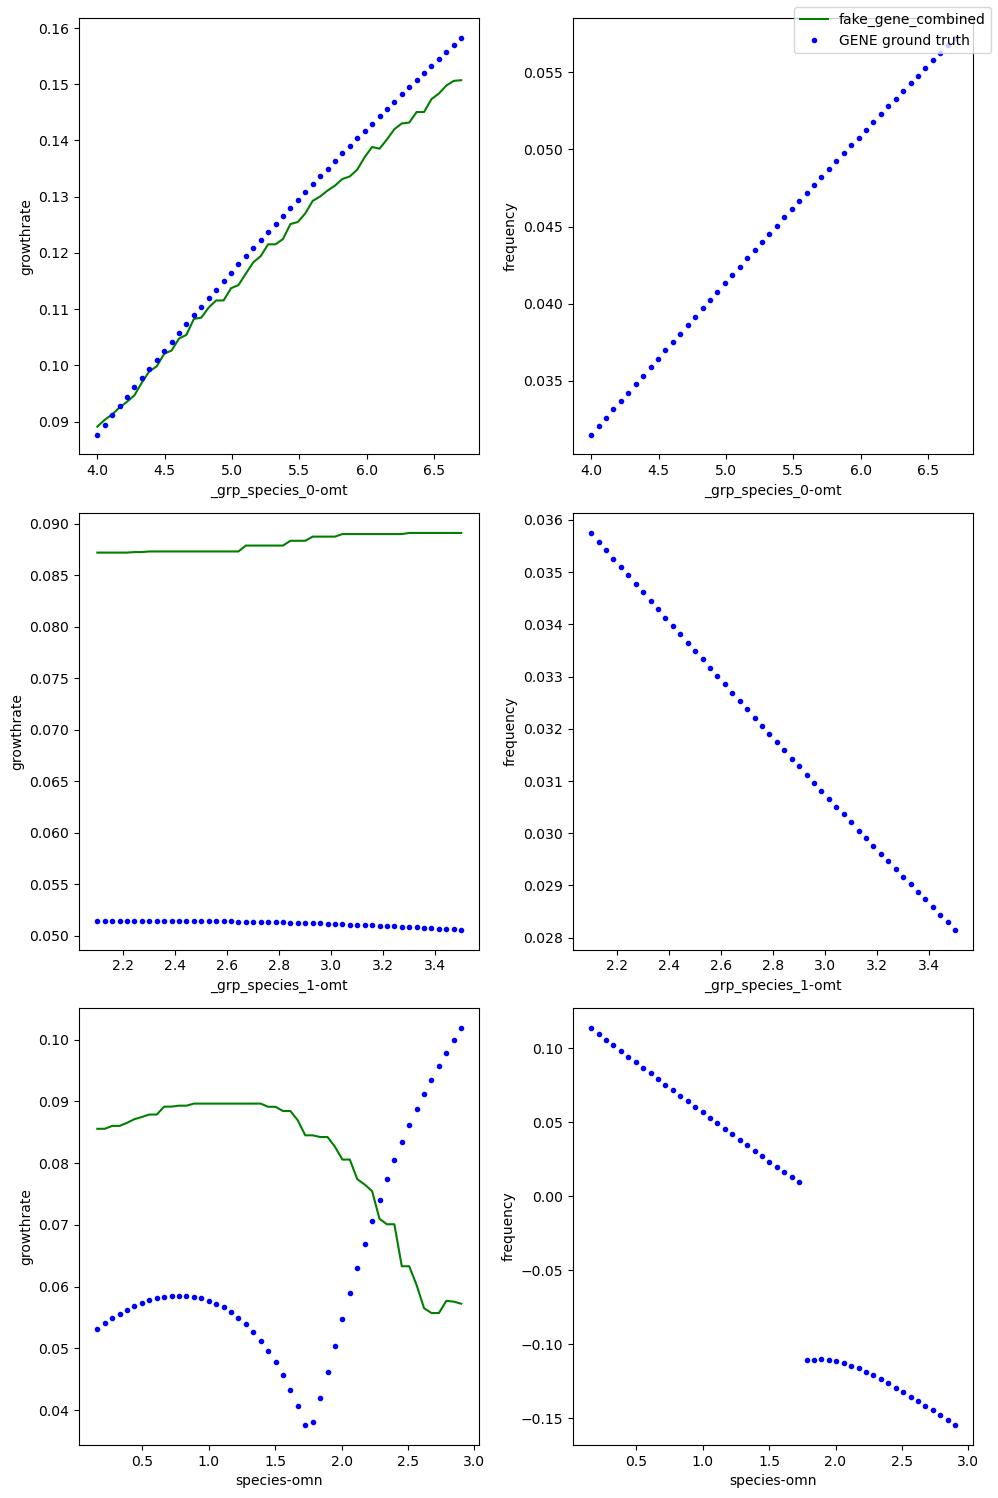

In [21]:
from gene_uq import mode_transition_test

mode_transition_test('fake_gene_combined', fake_gene_xgb)#'fg_ssg_xgb', fake_gene_xgb)

In [34]:
from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.models.XGBoost import XGBoost

fake_gene_gpr = GPR('fake_gene_gpr_combined')
fake_gene_gpr.fit(x=data_set_fake_gene_combined.x, y=data_set_fake_gene_combined.growthrates)#fg_ssg.x, y=fg_ssg.growthrates)

GPR is a parameterless approach and does not have a training step. Instead the hyperparameters are tuned to the data.
OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 1542.1286318078885
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  RatQuad.variance         |    1.0  |      +ve      |        
  RatQuad.lengthscale      |    1.0  |      +ve      |        
  RatQuad.power            |    2.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/3, f = -11424.285927652905
Optimization restart 2/3, f = -11424.283728452068
Optimization restart 3/3, f = -11424.283651401385
RESULTING HYPERS:
 
Name : GP regression
Objective : -11424.285927652905
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.           |               

<class 'paramiko.sftp_file.SFTPFile'>
Initialising dataset
SSH PATH None:None
SCAN LOG PATH /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'geneerr_batch-1_scanfiles-0.log'
 'scan_batch-0_scanfiles-0.log' 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-1_scanfiles-0.log

50 SAMPLES RAN OUT OF 55 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 50
NaN PE

,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,30.330,4.000000,5.387108,1.541791,0.08769,0.03151
1,31.028,4.055102,5.387108,1.541791,0.08940,0.03205
2,27.473,4.110204,5.387108,1.541791,0.09110,0.03260
3,27.004,4.165306,5.387108,1.541791,0.09278,0.03314
4,25.307,4.220408,5.387108,1.541791,0.09445,0.03369


,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,22.374,2.795488,2.100000,1.541791,0.05138,0.03575
1,22.731,2.795488,2.128571,1.541791,0.05138,0.03558
2,21.778,2.795488,2.157143,1.541791,0.05139,0.03542
3,21.954,2.795488,2.185714,1.541791,0.05140,0.03526
4,21.649,2.795488,2.214286,1.541791,0.05140,0.03510


,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,39.991,2.795488,5.387108,0.160000,0.05315,0.11363
1,41.053,2.795488,5.387108,0.215918,0.05404,0.10973
2,40.253,2.795488,5.387108,0.271837,0.05486,0.10586
3,39.620,2.795488,5.387108,0.327755,0.05560,0.10201
4,39.532,2.795488,5.387108,0.383674,0.05626,0.09817



LOADING RESULTS FROM FILE

gpr_fake_gene_combined.resultsgt IS LOADED


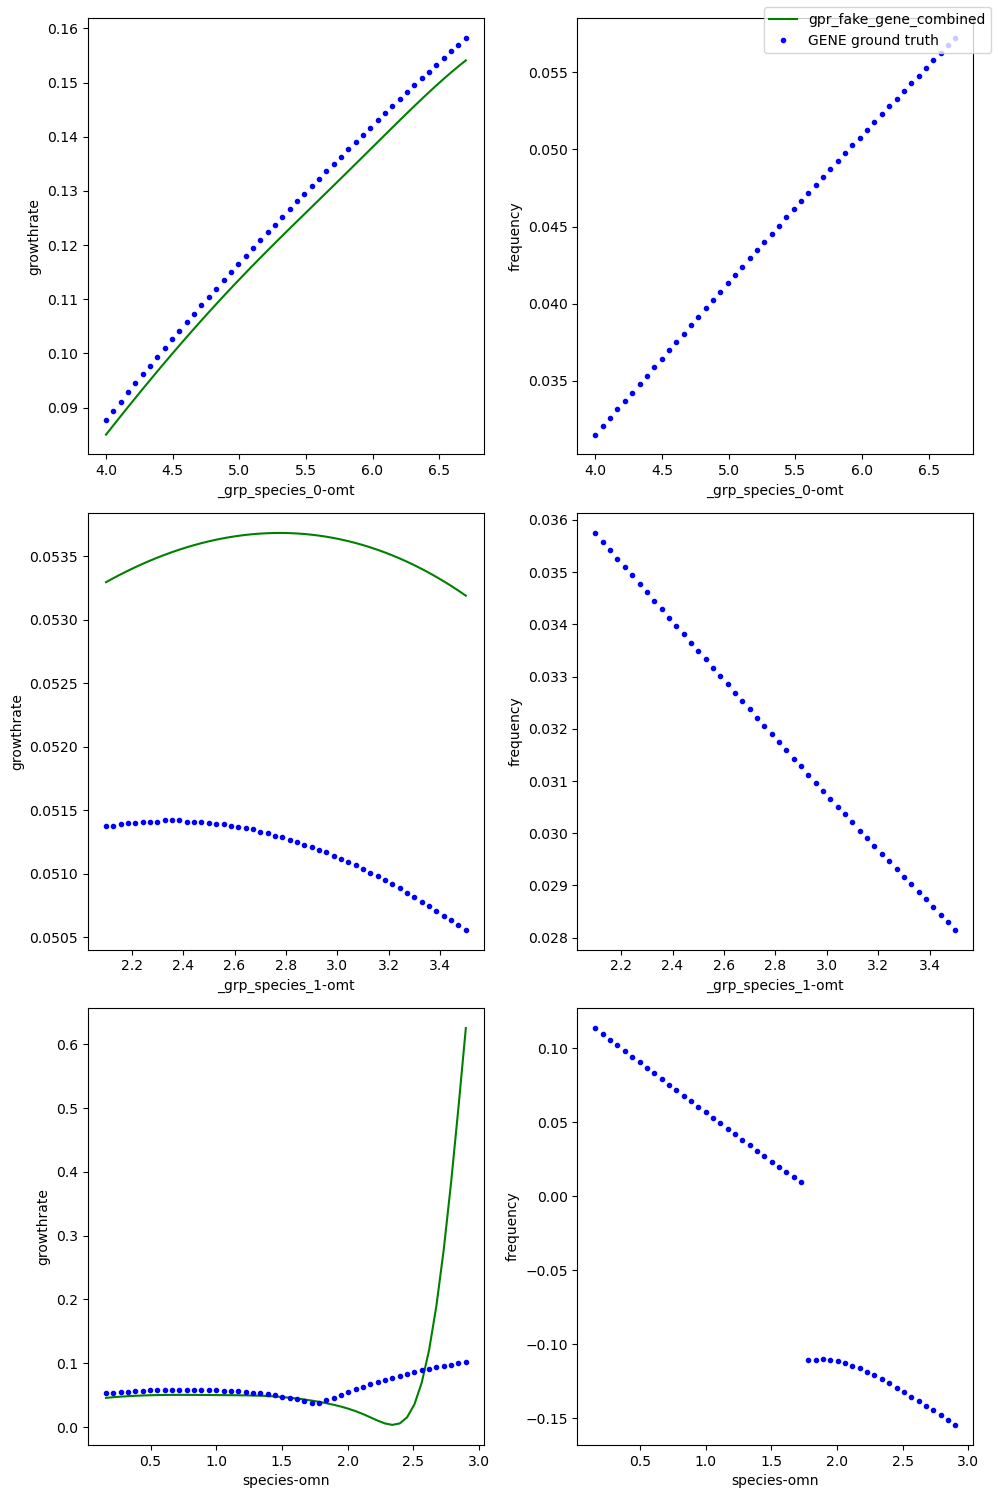

In [39]:
from gene_uq import mode_transition_test
mode_transition_test('gpr_fake_gene_combined', fake_gene_gpr)

In [27]:
from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.models.XGBoost import XGBoost

ssg_gpr = GPR('gpr_ssg')
ssg_gpr.fit(x=ssg_data.x, y=ssg_data.growthrates)#fg_ssg.x, y=fg_ssg.growthrates)

GPR is a parameterless approach and does not have a training step. Instead the hyperparameters are tuned to the data.
OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 80.10808582837245
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   (3,)  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/3, f = -434.69379305371564
Optimization restart 2/3, f = -434.6937922545803
Optimization restart 3/3, f = -434.6937436410459
RESULTING HYPERS:
 
Name : GP regression
Objective : -434.69379305371564
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             | 

Initialising dataset
SSH PATH None:None
SCAN LOG PATH /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'geneerr_batch-1_scanfiles-0.log'
 'scan_batch-0_scanfiles-0.log' 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-1_scanfiles-0.log

50 SAMPLES RAN OUT OF 55 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 50
NaN PERCENTAGE =  0.0
SETTING VARIABLES
TEST

,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,30.330,4.000000,5.387108,1.541791,0.08769,0.03151
1,31.028,4.055102,5.387108,1.541791,0.08940,0.03205
2,27.473,4.110204,5.387108,1.541791,0.09110,0.03260
3,27.004,4.165306,5.387108,1.541791,0.09278,0.03314
4,25.307,4.220408,5.387108,1.541791,0.09445,0.03369


,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,22.374,2.795488,2.100000,1.541791,0.05138,0.03575
1,22.731,2.795488,2.128571,1.541791,0.05138,0.03558
2,21.778,2.795488,2.157143,1.541791,0.05139,0.03542
3,21.954,2.795488,2.185714,1.541791,0.05140,0.03526
4,21.649,2.795488,2.214286,1.541791,0.05140,0.03510


,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,39.991,2.795488,5.387108,0.160000,0.05315,0.11363
1,41.053,2.795488,5.387108,0.215918,0.05404,0.10973
2,40.253,2.795488,5.387108,0.271837,0.05486,0.10586
3,39.620,2.795488,5.387108,0.327755,0.05560,0.10201
4,39.532,2.795488,5.387108,0.383674,0.05626,0.09817



COMPUTING RESULTS

GT DATA NAME modeTrans-highprec-_grp_species_0-omt

COMPUTING RESULTS

GT DATA NAME modeTrans-highprec-_grp_species_1-omt

COMPUTING RESULTS

GT DATA NAME modeTrans-highprec-species-omn


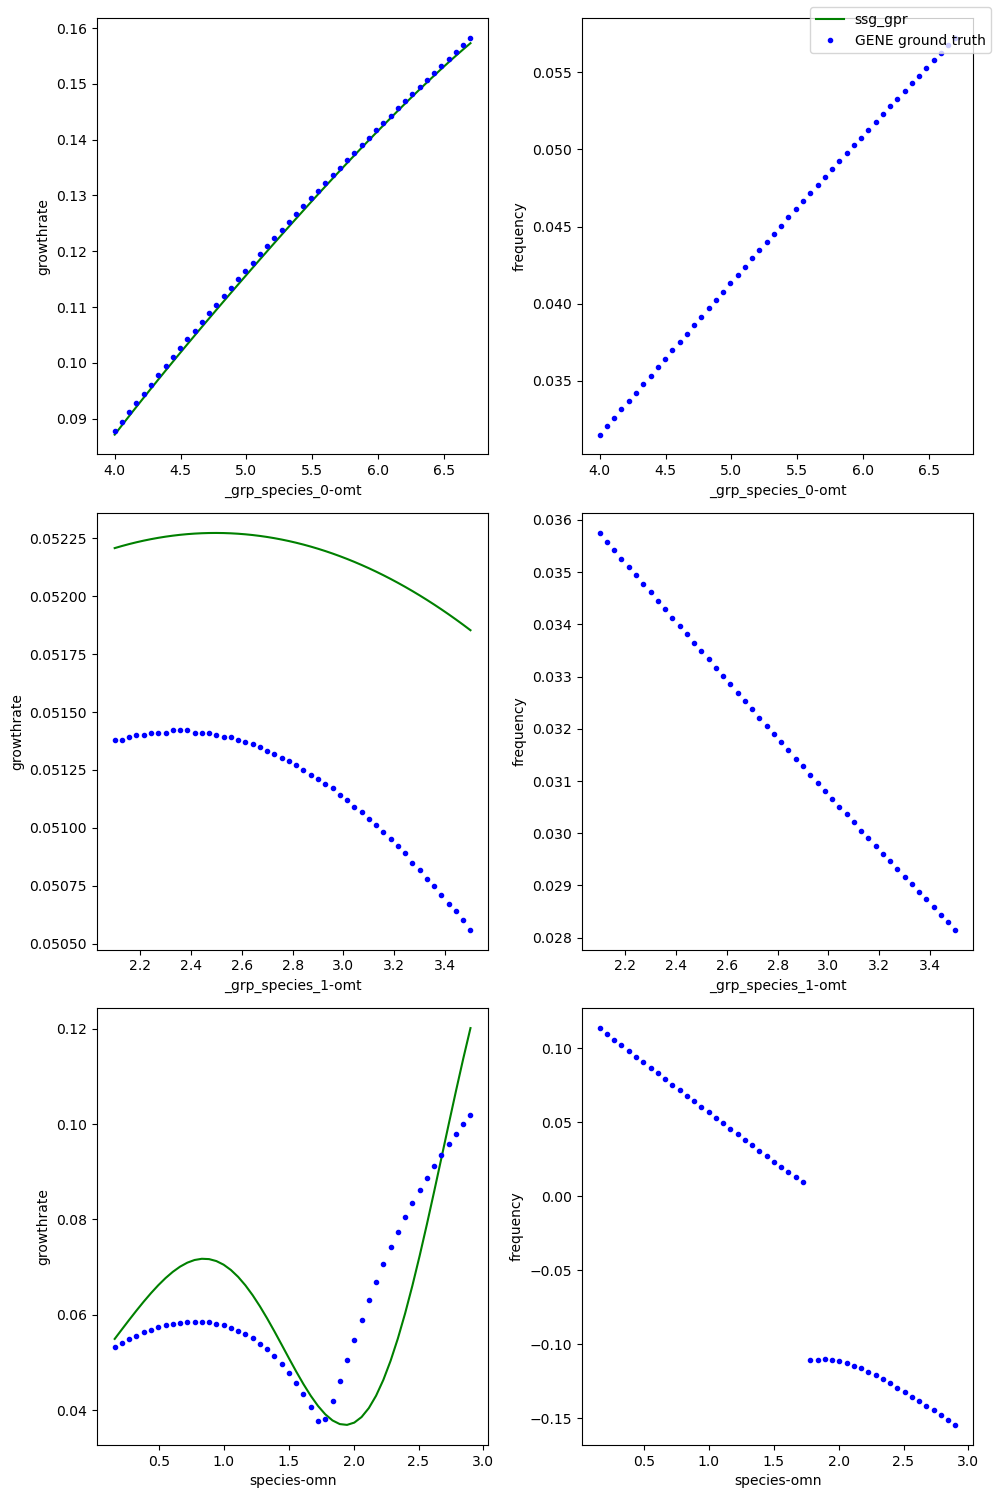

In [29]:
mode_transition_test('ssg_gpr',ssg_gpr)

# SparseSpACE for Fake GENE


In [11]:
%matplotlib inline
import numpy as np

import sparseSpACE
from sparseSpACE.Function import *
from sparseSpACE.spatiallyAdaptiveSingleDimension2 import *
from sparseSpACE.ErrorCalculator import *
from sparseSpACE.GridOperation import *

dim = 3

parameters = ['_grp_species_0-omt','_grp_species_1-omt','species-omn']
bounds = [(4,6.7), (2.1,3.5), (0.16,2.9)]

distributions = [("Uniform", b[0], b[1]) for b in bounds]

# a and b are the weighted integration domain boundaries.
# They should be set according to the distribution.
a = np.array([b[0] for b in bounds])
b = np.array([b[1] for b in bounds])

problem_function_wrapped = FunctionCustom(lambda x: fake_gene.predict(x, disclude_errors=True), output_dim=1)
# Create the grid operation and the weighted grid
op = UncertaintyQuantification(problem_function_wrapped, distributions, a, b)
grid = GlobalTrapezoidalGridWeighted(a, b, op, boundary=False)

# The grid initialization requires the weight functions from the
# operation; since currently the adaptive refinement takes the grid from
# the operation, it has to be passed here
op.set_grid(grid)

#for getting sobol indicies
polynomial_degree_max = 3
op.set_PCE_Function(polynomial_degree_max)

# Select the function for which the grid is refined;
# here it is the expectation and variance calculation via the moments
#op.set_expectation_variance_Function()

# Initialize the adaptive refinement instance and refine the grid until
# it has at least 200 points
combiinstance = SpatiallyAdaptiveSingleDimensions2(a, b, operation=op, norm=2, grid_surplusses=grid)
lmax = 2
error_operator = ErrorCalculatorSingleDimVolumeGuided()
combiinstance.performSpatiallyAdaptiv(1, lmax,
    error_operator, tol=0, max_evaluations=200, do_plot=False)

#needed for sobol indicies
# Create the PCE approximation; it is saved internally in the operation
op.calculate_PCE(None, combiinstance)

# Calculate the expectation and variance with the adaptive sparse grid
# weighted integral result
(E,), (Var,) = op.get_expectation_and_variance_PCE()
#(E,), (Var,) = op.calculate_expectation_and_variance(combiinstance)
print(f"E: {E}, Var: {Var}")

print("First order Sobol indices:", op.get_first_order_sobol_indices())
print("Total order Sobol indices:", op.get_total_order_sobol_indices())

0 [1, 1, 2] 1.0
1 [1, 2, 1] 1.0
2 [2, 1, 1] 1.0
3 [1, 1, 1] -2.0
Current number of function evaluations 7
combiintegral: [ 9.07774564e-02  5.65414213e-01  1.45992618e+00  1.14767000e-02
  4.33583009e+00  2.96980643e+00 -6.29556667e-02  3.03422513e+01
  2.32970467e-02  0.00000000e+00 -1.28618751e-01 -8.78318877e-02
 -6.40092999e-15  6.89436651e+02 -3.14988474e-03  6.17117480e+01
  5.12672521e+00  3.56598999e+01  3.61844318e-02 -3.21421068e-02]
Current error: 580.8474861200056
Finished refinement
Refined 2 times
Current number of function evaluations 9
combiintegral: [ 9.30725229e-02  6.02285729e-01  1.58331382e+00  3.50172684e-02
  4.82693368e+00  3.22027631e+00 -2.54501673e-02  3.50255002e+01
  7.10830586e-02  0.00000000e+00 -5.24847253e-02 -2.67989299e-01
 -4.01050391e-15  8.46886736e+02 -3.14988474e-03  7.12184763e+01
  5.51574920e+00  4.15344359e+01  1.10404555e-01 -2.28746967e-02]
Current error: 456.75100963689533
Finished refinement
Refined 2 times
Current number of function evalu

# Note Refinement function changes variance

when I use the PCE refienment function the variance is very large. 
when I use the exp var refinement function the variance is small and as expected. 